In [5]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pylab as plt
from keras.models import Sequential #Sequential 딥러닝 뉴런 레이어를 쌓기 위한, 큰 프레임을 만들기 위한 'Sequential 틀 객체'
from keras.layers.core import Dense, Dropout, Activation
#레이어 넣어줄 수 있는 Dense 임포팅
#Dropout 객체는 오버피팅을 피하기 위한 '가지치기' 객체임
#Activation : 각 레이어마다, 다음 레이어에 값과 가중치를 함께 정리해서 넘겨야 한다.

In [3]:
mnist = tf.keras.datasets.mnist
#iris = tf.keras.datasets.
#이미지 데이터 가져옴

In [4]:
mnist #이미지 데이터 객체

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [6]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data() #데이터를 불러와서 8대 2로 넣음

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train0 #이미지 데이터 -> 2차원 배열로 만들어놓고 -> 다시 1차원 배열로 만들어 인식시킨다.
#이미지는 원래 2차원 배열로 구성되어 있다.
#근데, 학습시킬때는 이 2차원 배열을 전부 1차원으로 만들어서 원핫인코딩(0,1)로서 만듦
#1은 색상이 있는 것인데, 이걸로 색상의 타입을 구분한다.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train0 #트레인 데이터의 레이블

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

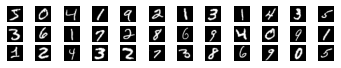

In [10]:
plt.figure(figsize=(6,1))
for i in range(36):
   plt.subplot(3,12, i+1)
   plt.imshow(X_train0[i], cmap='gray') #colormap = gray
   plt.axis('off')
plt.show()
#트레인 데이터 안에 들어가 있는 애들-> 그림으로 이미지화

In [13]:
#2차원 데이터를 1차원으로 만들어 넣어주는 함수가 있음 / 이미지는 2차원되어 있는걸 1차원으로 읽겠금 해서 컴퓨터가 읽음
X_train0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌
#28x28 짜리 = 784로 만듦
X_train #1차원 배열로 만들어놓음

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌

In [18]:
#범주형은 one-hot 인코딩으로 각 카테고리별 항목을 만들어, 해당하는 항목에 표시하는 형식으로 0,1로 구분하여줌.
#1은 해당항목에 속한다는 뜻이고, 
#0은 해당항목에 속하지 않는다는 뜻이다.
#원핫인코딩 : keras(to_categorical()) 

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train0 #요런애들을 원핫인코딩으로 해줘야함

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[0:5] #원핫인코딩임

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
model = Sequential() #딥러닝의 프레임 역할을 하는 객체


## 딥러닝 모델 구축(뉴런)

In [23]:
#입력레이어
model.add(Dense(512, input_shape=(784,))) #레이어를 넣어줌

In [24]:
model.add(Activation('relu')) #0일때는 이거고, 1일때는 이거고 배열들의 0과 1을 판단해서 뉴런 네트워크의 가중치를 판단하는 함수

In [25]:
model.add(Dropout(0.2)) #오버피팅을 방지하기 위해, 20%를 드랍시킨다.

In [26]:
#히든레이어
model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.2))

In [29]:
#출력층
model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
from keras.optimizers import Adam #ADAM 

In [31]:
#위에는 학습을 하는것인데, compile중
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy']
              ) #optimizer는 학습률 계산, Adam은 경사하강법에서 내려오는 방식임
              #metrics는 행렬 -> Accuracy를 계속 계산해나가면서 학습하겠다.

In [36]:
#훈련하기
hist = model.fit(X_train, Y_train,
                 batch_size=128, #epoch가 훑을때마다, 100개마다 가중치를 더해준다는 의미이다. 아마 노드가 지나다니면서 학습할때, 하나씩마다 가중치를 평가하는것이 아니라, 100개마다 하는듯?
                 epochs=5,
                 verbose=1,
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.5536 - accuracy: 0.7890 - val_loss: 0.5261 - val_accuracy: 0.7925
Epoch 2/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.4620 - accuracy: 0.8529 - val_loss: 0.3790 - val_accuracy: 0.8851
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.3447 - accuracy: 0.8791 - val_loss: 0.3220 - val_accuracy: 0.8827
Epoch 4/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.2997 - accuracy: 0.8803 - val_loss: 0.2928 - val_accuracy: 0.8793
Epoch 5/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.2643 - accuracy: 0.8860 - val_loss: 0.2614 - val_accuracy: 0.8837


In [39]:
#테스트데이터로 정확도 판단
score = model.evaluate(X_test, Y_test, verbose=1) #verbose는 0과 1 번에 따라 출력을 어떠헥 해줄것인가ㅏ, 출력양식

10000/10000 [==============================] - 1s 66us/step


In [40]:
score
#학습 모델(model) -> X_test를 넣었을때 Y_test 정답을 맞출 확률 88%, 

[0.26140864508152006, 0.8837000131607056]

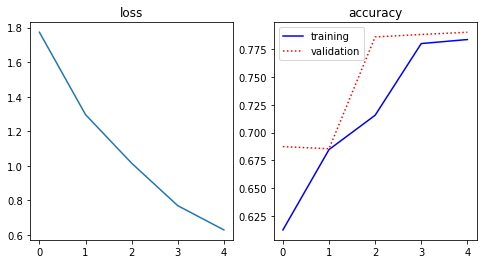

In [35]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], '-b', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation') #
plt.title('accuracy')
plt.legend()
plt.show()


In [41]:
#모델을 사용하여예측해봄

model.predict(X_test[:1, :])

#0번부터 9번까지 될 확률을 뽑아준것임
#이미지가 0~9번까지 지금 분류되어있잖아. 

array([[0.00518856, 0.00455821, 0.00489943, 0.00659735, 0.00502669,
        0.00433899, 0.00364124, 0.95308876, 0.00437776, 0.00828288]],
      dtype=float32)

In [42]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

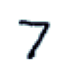

In [44]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=plt.cm.bone_r) #이 행에 끼겠다
plt.grid(False)
plt.axis("off")
plt.show()

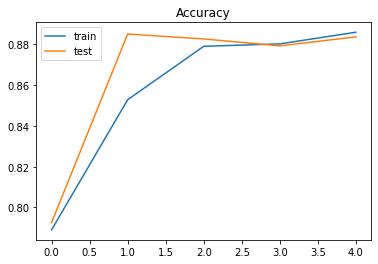

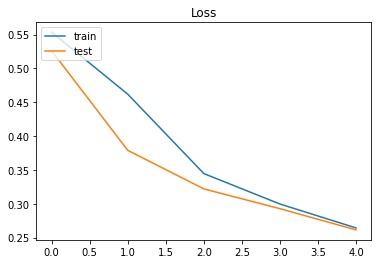

In [45]:
import matplotlib.pyplot as plt
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()